# Analyzing IMDB Data in Keras

In [1]:
# Imports
import numpy as np
import keras
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.preprocessing.text import Tokenizer
from keras import optimizers, regularizers, losses, metrics
from keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

Using TensorFlow backend.


## 1. Loading the data
This dataset comes preloaded with Keras, so one simple command will get us training and testing data. There is a parameter for how many words we want to look at. We've set it at 1000, but feel free to experiment.

In [2]:
# Loading the data (it's preloaded in Keras)
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=1000)

print(x_train.shape)
print(x_test.shape)

(25000,)
(25000,)


## 2. Examining the data
Notice that the data has been already pre-processed, where all the words have numbers, and the reviews come in as a vector with the words that the review contains. For example, if the word 'the' is the first one in our dictionary, and a review contains the word 'the', then there is a 1 in the corresponding vector.

The output comes as a vector of 1's and 0's, where 1 is a positive sentiment for the review, and 0 is negative.

In [3]:
print(x_train[0])
print(y_train[0])

[1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
1


## 3. One-hot encoding the output
Here, we'll turn the input vectors into (0,1)-vectors. For example, if the pre-processed vector contains the number 14, then in the processed vector, the 14th entry will be 1.

In [4]:
# One-hot encoding the output into vector mode, each of length 1000
tokenizer = Tokenizer(num_words=1000)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')
print(x_train[0])
print(len(x_train[0]))

[0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0.
 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0.
 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

And we'll also one-hot encode the output.

In [5]:
# One-hot encoding the output
num_classes = 2
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train.shape)
print(y_test.shape)
print(y_train[0])

(25000, 2)
(25000, 2)
[0. 1.]


## 4. Building the  model architecture
Build a model here using sequential. Feel free to experiment with different layers and sizes! Also, experiment adding dropout to reduce overfitting.

In [6]:
# Building the Model
model = Sequential()
model.add(Dense(128, input_shape=[1000]))
model.add(Activation('sigmoid'))
model.add(Dropout(.3))
#model.add(Dense(128))
#model.add(Activation('sigmoid'))
#model.add(Dropout(.3))
#model.add(Dense(64))
#model.add(Activation('sigmoid'))
#model.add(Dropout(.2))
model.add(Dense(32))
model.add(Activation('sigmoid'))
model.add(Dropout(.2))
model.add(Dense(2))
model.add(Activation('softmax'))

sgd = optimizers.SGD(lr=0.1, momentum=0.8, decay=0.0, nesterov=False)
model.compile(loss=losses.categorical_crossentropy,
             optimizer=sgd, metrics=[metrics.categorical_accuracy])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               128128    
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
_________________________________________________________________
activation_2 (Activation)    (None, 32)                0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
__________

## 5. Training the model
Run the model here. Experiment with different batch_size, and number of epochs!

In [7]:
# Following function is credit to Parneet Kaur
# http://parneetk.github.io/blog/neural-networks-in-keras/
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['categorical_accuracy'])+1),model_history.history['categorical_accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_categorical_accuracy'])+1),model_history.history['val_categorical_accuracy'])
    axs[0].set_title('Model Categorical Accuracy')
    axs[0].set_ylabel('Categorical Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['categorical_accuracy'])+1),len(model_history.history['categorical_accuracy'])/10)
    axs[0].legend(['train', 'validation'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'validation'], loc='best')
    plt.show()

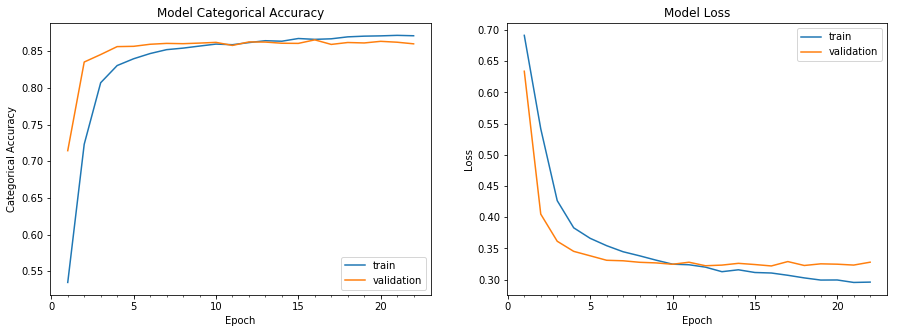

In [8]:
# Define early stop criteria
earlystop = EarlyStopping(monitor='val_loss', min_delta=0.0005, patience=10, verbose=0, mode='min')
callbacks_list=[earlystop]
# Run the model.
# Use verbose=1 to get a gist of the training output
model_history = model.fit(x_train, y_train, epochs=100, batch_size=100, 
                          validation_split=0.2, callbacks=callbacks_list, verbose=0)
#print model_history.history
plot_model_history(model_history)

## 6. Evaluating the model
This will give you the accuracy of the model, as evaluated on the testing set. Can you get something over 85%?

In [9]:
score = model.evaluate(x_test, y_test, verbose=1)
print("Accuracy: ", score[1])#, "Loss: ", score[0])

25000/25000 [==============================] - 1s 49us/step
('Accuracy: ', 0.85932)


**Notes and Obeservations**

Increase learning rate speed up the training rate, increase by 3 times (0.01 -> 0.03 -> 0.1). 0.1 seems to be a suitable value
Use momentum greatly enhance (speed up) the learning process. A good beta value start between 0.5 and 0.9